Análises:
1. Perceber quais são as horas com mais clientes?
2. Quais são as aulas com mais clientes?
3. Quais são os dias da semana com mais clientes?
4. Comparação entre ginásios

Alterações:
1. Colocar a possibilidade de filtrar por datas
2. Utilizar um gráfico bqplot para utilizar e filtrar as datas e atualizar os outros gráficos todos

Problemas bokeh não trabalhar no voilá

# Dados recolhidos aula de grupo RM

In [548]:
import pandas as pd
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual,widgets
import plotly.offline as py
import datetime,calendar
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate


dfAGRM = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRTS5OWao3Qq0w6nkKgSgmaWgg4_ALnLGsWf10wuIeSAllFmZIPbuvnI9LSgHN3TSzufsoIVDrDlJNF/pub?gid=1858097418&single=true&output=csv')

## Preparação dos dados

dfAGRM.columns=['data','dataOld','hora','pessoas','aula']

dfAGRM.fillna(0,inplace=True)

dfAGRM.hora=pd.to_datetime(dfAGRM['hora'])
dfAGRM.data=pd.to_datetime(dfAGRM['data'])
dfAGRM.data=dfAGRM.data.dt.date
#dfAGRM.dropna(subset=['hora'],inplace=True)

#Vamos retirar as meias horas
dfAGRM['hora']=dfAGRM['hora'].apply(lambda x: x.hour)

### Calcular o dia da semana

# Por extenso
#dfSEAlv['diaSemana']=dfSEAlv['data'].apply(lambda x: x.day_name(locale='pt'))
# Vamos calcular o dia da semana 0 é segunda
dfAGRM['diaSemana']=dfAGRM['data'].apply(lambda x: x.weekday())

#Calcular o mês
dfAGRM['mes']=dfAGRM['data'].apply(lambda x: x.month)



In [549]:
cor = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 
       'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
       'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
       'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
       'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
       'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
       'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 
       'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
       'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 
       'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
       'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 
       'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 
       'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 
       'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 
       'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 
       'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

In [550]:
print('Data inicio: ',dfAGRM.data.min(),'Data fim:',dfAGRM.data.max())

Data inicio:  2019-12-04 Data fim: 2020-03-04


Os dados são referentes ao período entre data inicio e data fim. Vamos confirmar algums dados

In [551]:
cols = ['aula','pessoas']

dfAGRM.pessoas=pd.to_numeric(dfAGRM['pessoas'], errors='coerce',downcast='integer')
#pd.to_numeric(dfAGRM['pessoas'], errors='coerce')
#dfAGRM.dropna(subset=['pessoas'],inplace=True)

In [552]:
funcao = [('soma',np.sum),('media',np.mean),('mediana',np.median), ('máx',np.max) ,('min',np.min)]
todasAulas = ['sospopeye', 'speeding', 'pilates', 'bodypump', 'step','soscelulite', 'sosabs', 'sosbunda', 
              'bodybalance', 'endurance','bodycombat', 'zumba', '100pança', 'gain', '100stress']
cardio = ['speeding','endurance','bodycombat','zumba', '100stress','step']
forca = ['sospopeye','popeye','sosabs','sosbunda','gain','bodypump','soscelulite','100pança','bunda']
relaxamento = ['bodybalance','yoga','pilates']

opcoes = [('cardio',cardio),('forca',forca),('relaxamento',relaxamento),('todas',todasAulas)]

## Número de clientes por hora

A barra preta representa o intervalo de confiança com 95%, i.e. o número de clientes tem uma estimativa limite minimo e máximo por hora de acordo com o registos nessa hora

In [553]:
# Vamos selecionar as colunas SOS e sem SOS
comsos= ['soscelulite','sosabs', 'sosbunda', 'sospopeye', 'sosspeeding']
semsos=['popeye', 'speeding', 'pilates', 'bodypump', 'step','bodybalance', 'endurance','bodycombat', 'zumba', '100pança', 'gain','100stress','bunda']

In [554]:
def f(funcao,sos,porMes,mes):
    if porMes == True:
        dados = dfAGRM.loc[dfAGRM['mes'] == mes]
    else:
        dados = dfAGRM
    if sos == True:
        dados=dados.loc[dados['aula'].isin(comsos)]
    else:
        dados=dados.loc[dados['aula'].isin(semsos)]
        
    if dados.empty:
        print('Não tem dados')
    else:
        plt.rcParams['figure.figsize'] = [15, 3]
        sns.barplot(x='hora',y='pessoas',data=dados,palette='rainbow',estimator=funcao).set_title('Aulas de Grupo RM')
        plt.xticks(rotation=0);
        fig = plt.gcf() # "Get current figure"
        plt.show()

interact(f, funcao=funcao,sos=True,porMes=True,mes=widgets.IntSlider(min=1,max=12,step=1,value=1));

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x000001FF901D8AF8>), …

## Clientes por dia semana

In [555]:
def f(funcao,sos):
    if sos == True:
        dados=dfAGRM.loc[dfAGRM['aula'].isin(comsos)]
    else:
        dados=dfAGRM.loc[dfAGRM['aula'].isin(semsos)]
        
    plt.rcParams['figure.figsize'] = [15, 3]
    sns.barplot(x='diaSemana',y='pessoas',data=dados,palette='rainbow',estimator=funcao).set_title('Aulas de Grupo RM')
    plt.xticks(np.arange(7),('seg','ter','qua','qui','sex','sab','dom'))
    fig = plt.gcf() # "Get current figure"
    plt.show()

interact(f, funcao=funcao,sos=True);

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x000001FF901D8AF8>), …

## Clientes por hora e aula

In [556]:
def f(cor,funcao,tipo,sos):
    if sos == True:
        dados=dfAGRM.loc[dfAGRM['aula'].isin(comsos)]
    else:
        dados=dfAGRM.loc[dfAGRM['aula'].isin(semsos)]
    plt.rcParams['figure.figsize'] = [15, 6]
    if dados.loc[dados['aula'].isin(tipo)].empty:
        print('Não tem dados')
    else:
        sns.lineplot(x='hora',y='pessoas',hue='aula',data=dados.loc[dados['aula'].isin(tipo)],palette=cor,
                     estimator=funcao,ci=0).set_title('Aulas Grupo RM - '+str(tipo));
        fig = plt.gcf() # "Get current figure"
        plt.show()

interact(f,cor=cor,funcao=funcao,tipo=opcoes,sos=True);

interactive(children=(Dropdown(description='cor', options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', '…

In [557]:
def f(aula,funcao):
    plt.rcParams['figure.figsize'] = [15, 4]
    sns.barplot(x='hora',y='pessoas',hue='aula',data=dfAGRM[dfAGRM.aula==aula],palette='rainbow',
                 estimator=funcao,ci=0).set_title('Sala de exercicio RM');
    
    fig = plt.gcf() # "Get current figure"
    plt.show()

interact(f, aula=dfAGRM.aula.unique(),funcao=funcao);

interactive(children=(Dropdown(description='aula', options=('popeye', 'zumba', 'speeding', 'gain', 'pilates', …

### Quais são as aulas com mais alunos por dia da semana?

In [558]:
def f(funcao,tipo,sos):
    if sos == True:
        dados=dfAGRM.loc[dfAGRM['aula'].isin(comsos)]
    else:
        dados=dfAGRM.loc[dfAGRM['aula'].isin(semsos)]    
    plt.rcParams['figure.figsize'] = [20, 5]
    #plt.xticks(rotation=45);
    if dados.loc[dados['aula'].isin(tipo)].empty:
        print('Não tem dados')
    else:
        sns.barplot(x='aula',y='pessoas',hue='diaSemana',
                    data=dados.loc[dados['aula'].isin(tipo)],
                    palette='Accent',estimator=funcao).set_title('Sala exercício RM')
    
        fig = plt.gcf() # "Get current figure"
    

interact(f,funcao=funcao,tipo=opcoes,sos=True);

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x000001FF901D8AF8>), …

## Mapa de utilização 

In [559]:
dfAGRM['dia']=dfAGRM['data'].apply(lambda x: x.day)

In [560]:
diaSemana = [('seg',0),
          ('ter',1),
          ('qua',2),
          ('qui',3),
          ('sex',4),
          ('sab',5),
          ('dom',6)]

In [561]:
#np.round(pd.pivot_table(dfAGRM,values='pessoas',index='hora',columns=['aula'],aggfunc=np.mean,margins=True,fill_value=0))

In [562]:
def f(funcao,dia,sos,porMes,mes):
    if porMes == True:
        dados = dfAGRM.loc[dfAGRM['mes'] == mes]
    else:
        dados = dfAGRM
    if sos == True:
        dados=dados.loc[dados['aula'].isin(comsos)]
    else:
        dados=dados.loc[dados['aula'].isin(semsos)]
        
    if dados.empty:
        print('Não tem dados')
    else:
        dados=dados.loc[dados['diaSemana']==dia]
        quadro = np.round(pd.pivot_table(dados,values='pessoas',index='hora',columns=['aula'],aggfunc=funcao,margins=True,fill_value=0))
        #print(quadro)
        print(tabulate(quadro,tablefmt='github',floatfmt=".2f",headers=quadro.columns))
        #print('\nPor dia do mês:')
        #quadro2 = pd.pivot_table(dados,values='pessoas',index='hora',columns=['dia'],aggfunc=funcao,margins=True,fill_value=0)
        #print(tabulate(quadro2,floatfmt=".1f",headers=['hora']+list(range(dados.dia.min(),dados.dia.max()+1))+['total']))
        quadro.to_html()

interact(f, funcao=funcao,dia=diaSemana,sos=True,porMes=True,mes=widgets.IntSlider(min=1,max=12,step=1,value=1));

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x000001FF901D8AF8>), …

## Evolução clientes aulas de grupo

### Dados históricos

In [563]:
#dfAGRM.groupby('data')['pessoas'].sum().reset_index()

In [564]:
dfAGRM.head()

,data,dataOld,hora,pessoas,aula,diaSemana,mes,dia
0,2019-12-04,2019/12/04,15,10,popeye,2,12,4
1,2019-12-04,2019/12/04,19,30,zumba,2,12,4
2,2019-12-09,2019/12/09,8,6,speeding,0,12,9
3,2019-12-09,2019/12/09,9,4,gain,0,12,9
4,2019-12-09,2019/12/09,10,3,pilates,0,12,9


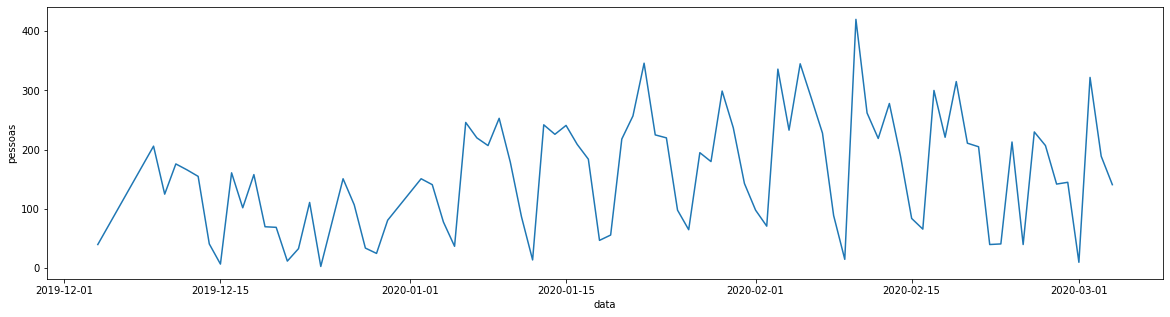

In [565]:
sns.lineplot(x="data", y="pessoas", data=dfAGRM.groupby('data')['pessoas'].sum().reset_index());

In [566]:
#from bokeh.plotting import figure, output_file, show
#from bokeh.io import output_notebook
#from bokeh.models import HoverTool
#from bqplot import pyplot as plt
#import ipywidgets as widgets
#
#output_notebook()
#
#def f(aula):
#    dados=dfAGRM[dfAGRM.aula==aula]
#    dados = dados.groupby('data')['pessoas'].sum().reset_index()
#    # Format the tooltip
#    tooltips = [("valor", "@pessoas")]
#
#    plot = figure(title='Evolução clientes', x_axis_label='Data',y_axis_label='Clientes',plot_width=1100,plot_height=300,x_axis_type="datetime")
#    plot.xaxis.major_label_orientation = 3.14/2
#    plot.xaxis.ticker.desired_num_ticks = int(len(dfAGRM.data.unique()))
#    plot.line('data', 'pessoas', line_width=2, line_color='orange', legend_label='total clientes',source=dados)
#    plot.add_tools(HoverTool(tooltips=tooltips))
#    plot.circle('data', 'pessoas',source=dados)
#
#    show(plot)
#
#interact(f, aula=dfAGRM.aula.unique());
#
#

In [567]:
#import warnings
#warnings.simplefilter('ignore')

In [568]:
##!pip install fbprophet
#from fbprophet import Prophet
#
#dados = dfAGRM.groupby('data')['pessoas'].sum().reset_index()
#    
## Renomear as colunas
#dados.columns = ['ds','y']
## Instanciação
#pro = Prophet()
#pro.fit(dados)
#
#future = pro.make_future_dataframe(periods=60,freq='D')
##print(future.tail())
#forecast = pro.predict(future)
#fig1=pro.plot(forecast)

# Dados recolhidos aula de grupo Alv

In [569]:
import pandas as pd
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual,widgets
import plotly.offline as py
import datetime,calendar
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate


dfAGAlv = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5UTTnPnInrXgEB7IQxfNSckso1xmFL9ZQYea2doSq4Lk2CpWeeFgyNAWsMtXsK_SwrwPtrGeTXj-k/pub?gid=1187849082&single=true&output=csv')

## Preparação dos dados

dfAGAlv.columns=['data','dataOld','hora','pessoas','aula']

dfAGAlv.fillna(0,inplace=True)

dfAGAlv.hora=pd.to_datetime(dfAGAlv['hora'], errors='ignore')
dfAGAlv.data=pd.to_datetime(dfAGAlv['data'], errors='ignore')
dfAGAlv.data=dfAGAlv.data.dt.date



#Vamos retirar as meias horas
dfAGAlv['hora']=dfAGAlv['hora'].apply(lambda x: x.hour)
dfAGAlv['hora'] = dfAGAlv['hora'].astype(int)
### Calcular o dia da semana

# Por extenso
#dfSEAlv['diaSemana']=dfSEAlv['data'].apply(lambda x: x.day_name(locale='pt'))
# Vamos calcular o dia da semana 0 é segunda
dfAGAlv['diaSemana']=dfAGAlv['data'].apply(lambda x: x.weekday())

#Calcular o mês
dfAGAlv['mes']=dfAGAlv['data'].apply(lambda x: x.month)



In [570]:
print('Data inicio: ',dfAGAlv.data.min(),'Data fim:',dfAGAlv.data.max())

Data inicio:  2019-12-09 Data fim: 2020-03-04


Os dados são referentes ao período entre data inicio e data fim. Vamos confirmar algums dados

In [571]:
cols = ['aula','pessoas']

dfAGAlv.pessoas=pd.to_numeric(dfAGAlv['pessoas'], errors='coerce',downcast='integer')
#pd.to_numeric(dfAGAlv['pessoas'], errors='coerce')
#dfAGAlv.dropna(subset=['pessoas'],inplace=True)

In [572]:
funcao = [('soma',np.sum),('media',np.mean),('mediana',np.median), ('máx',np.max) ,('min',np.min)]
todasAulas = ['sospopeye', 'speeding', 'pilates', 'bodypump', 'step','soscelulite', 'sosabs', 'sosbunda', 
              'bodybalance', 'endurance','bodycombat', 'zumba', '100pança', 'gain', '100stress']
cardio = ['speeding','endurance','bodycombat','zumba', '100stress','step']
forca = ['sospopeye','popeye','sosabs','sosbunda','gain','bodypump','soscelulite','100pança','bunda']
relaxamento = ['bodybalance','yoga','pilates']

opcoes = [('cardio',cardio),('forca',forca),('relaxamento',relaxamento),('todas',todasAulas)]

## Número de clientes por hora

A barra preta representa o intervalo de confiança com 95%, i.e. o número de clientes tem uma estimativa limite minimo e máximo por hora de acordo com o registos nessa hora

In [573]:
# Vamos selecionar as colunas SOS e sem SOS
comsos= ['soscelulite','sosabs', 'sosbunda', 'sospopeye', 'sosspeeding']
semsos=['popeye', 'speeding', 'pilates', 'bodypump', 'step','bodybalance', 'endurance','bodycombat', 'zumba', '100pança', 'gain','100stress','bunda']

In [574]:
def f(funcao,sos,porMes,mes):
    if porMes == True:
        dados = dfAGAlv.loc[dfAGAlv['mes'] == mes]
    else:
        dados = dfAGAlv
    if sos == True:
        dados=dados.loc[dados['aula'].isin(comsos)]
    else:
        dados=dados.loc[dados['aula'].isin(semsos)]
        
    if dados.empty:
        print('Não tem dados')
    else:
        plt.rcParams['figure.figsize'] = [15, 3]
        sns.barplot(x='hora',y='pessoas',data=dados,palette='rainbow',estimator=funcao).set_title('Aulas de Grupo Alv')
        plt.xticks(rotation=0);
        fig = plt.gcf() # "Get current figure"
        plt.show()

interact(f, funcao=funcao,sos=True,porMes=True,mes=widgets.IntSlider(min=1,max=12,step=1,value=1));

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x000001FF901D8AF8>), …

## Clientes por dia semana

In [575]:
def f(funcao,sos):
    if sos == True:
        dados=dfAGAlv.loc[dfAGAlv['aula'].isin(comsos)]
    else:
        dados=dfAGAlv.loc[dfAGAlv['aula'].isin(semsos)]
        
    plt.rcParams['figure.figsize'] = [15, 3]
    sns.barplot(x='diaSemana',y='pessoas',data=dados,palette='rainbow',estimator=funcao).set_title('Aulas de Grupo Alv')
    plt.xticks(np.arange(7),('seg','ter','qua','qui','sex','sab','dom'))
    fig = plt.gcf() # "Get current figure"
    plt.show()

interact(f, funcao=funcao,sos=True);

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x000001FF901D8AF8>), …

## Clientes por hora e aula

In [576]:
def f(cor,funcao,tipo,sos):
    if sos == True:
        dados=dfAGAlv.loc[dfAGAlv['aula'].isin(comsos)]
    else:
        dados=dfAGAlv.loc[dfAGAlv['aula'].isin(semsos)]
    plt.rcParams['figure.figsize'] = [15, 6]
    if dados.loc[dados['aula'].isin(tipo)].empty:
        print('Não tem dados')
    else:
        sns.lineplot(x='hora',y='pessoas',hue='aula',data=dados.loc[dados['aula'].isin(tipo)],palette=cor,
                     estimator=funcao,ci=0).set_title('Aulas Grupo Alv - '+str(tipo));
        fig = plt.gcf() # "Get current figure"
        plt.show()

interact(f,cor=cor,funcao=funcao,tipo=opcoes,sos=True);

interactive(children=(Dropdown(description='cor', options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', '…

In [577]:
def f(aula,funcao):
    plt.rcParams['figure.figsize'] = [15, 4]
    sns.barplot(x='hora',y='pessoas',hue='aula',data=dfAGAlv[dfAGAlv.aula==aula],palette='rainbow',
                 estimator=funcao,ci=0).set_title('Sala de exercicio Alv');
    
    fig = plt.gcf() # "Get current figure"
    plt.show()

interact(f, aula=dfAGAlv.aula.unique(),funcao=funcao);

interactive(children=(Dropdown(description='aula', options=('sosabs', 'endurance', 'sosbunda', 'sospanda', 'bo…

### Quais são as aulas com mais alunos por dia da semana?

In [578]:
def f(funcao,tipo,sos):
    if sos == True:
        dados=dfAGAlv.loc[dfAGAlv['aula'].isin(comsos)]
    else:
        dados=dfAGAlv.loc[dfAGAlv['aula'].isin(semsos)]    
    plt.rcParams['figure.figsize'] = [20, 5]
    #plt.xticks(rotation=45);
    if dados.loc[dados['aula'].isin(tipo)].empty:
        print('Não tem dados')
    else:
        sns.barplot(x='aula',y='pessoas',hue='diaSemana',
                    data=dados.loc[dados['aula'].isin(tipo)],
                    palette='Accent',estimator=funcao).set_title('Sala exercício Alv')
    
        fig = plt.gcf() # "Get current figure"
    

interact(f,funcao=funcao,tipo=opcoes,sos=True);

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x000001FF901D8AF8>), …

## Mapa de utilização 

In [579]:
dfAGAlv['dia']=dfAGAlv['data'].apply(lambda x: x.day)

In [580]:
#dfAGAlv.head()

In [581]:
#dfAGAlv.diaSemana.value_counts()

In [582]:
def f(funcao,dia,sos,porMes,mes):
    if porMes == True:
        dados = dfAGAlv.loc[dfAGAlv['mes'] == mes]
    else:
        dados = dfAGAlv
    if sos == True:
        dados=dados.loc[dados['aula'].isin(comsos)]
    else:
        dados=dados.loc[dados['aula'].isin(semsos)]
        
    if dados.empty:
        print('Não tem dados')
    else:
        dados=dados.loc[dados['diaSemana']==dia]
        quadro = np.round(pd.pivot_table(dados,values='pessoas',index='hora',columns=['aula'],aggfunc=funcao,margins=True,fill_value=0))
        #print(quadro)
        print(tabulate(quadro,tablefmt='github',floatfmt=".2f",headers=quadro.columns))
        #print('\nPor dia do mês:')
        #quadro2 = pd.pivot_table(dados,values='pessoas',index='hora',columns=['dia'],aggfunc=funcao,margins=True,fill_value=0)
        #print(tabulate(quadro2,floatfmt=".1f",headers=['hora']+list(range(dados.dia.min(),dados.dia.max()+1))+['total']))
        quadro.to_html()

interact(f, funcao=funcao,dia=diaSemana,sos=True,porMes=True,mes=widgets.IntSlider(min=1,max=12,step=1,value=1));

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x000001FF901D8AF8>), …

## Evolução clientes aulas de grupo

### Dados históricos

In [583]:
#dfAGAlv.groupby('data')['pessoas'].sum().reset_index()

In [584]:
#sns.lineplot(x="data", y="pessoas", data=dfAGAlv.groupby('data')['pessoas'].sum().reset_index());

In [585]:
data=dfAGAlv.groupby('data')['pessoas'].sum().reset_index()

In [586]:
data.data = pd.to_datetime(data['data'], errors='ignore')

In [587]:
from bqplot import pyplot as iplt
import ipywidgets as widgets
import numpy as np

fig_lines = iplt.figure(title='Dados históricos')
fig_lines.layout.height ='300px'
fig_lines.layout.width = '800px'
lines = iplt.plot(x=data.data, y=data.pessoas )
fig_lines

Figure(axes=[Axis(scale=DateScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top': 6…

In [588]:
#from bokeh.plotting import figure, output_file, show
#from bokeh.io import output_notebook
#from bokeh.models import HoverTool
#
#output_notebook()
#
#def f(aula):
#    dados=dfAGAlv[dfAGAlv.aula==aula]
#    dados = dados.groupby('data')['pessoas'].sum().reset_index()
#    # Format the tooltip
#    tooltips = [("valor", "@pessoas")]
#
#    plot = figure(title='Evolução clientes', x_axis_label='Data',y_axis_label='Clientes',plot_width=1100,plot_height=300,x_axis_type="datetime")
#    plot.xaxis.major_label_orientation = 3.14/2
#    plot.xaxis.ticker.desired_num_ticks = int(len(dfAGAlv.data.unique()))
#    plot.line('data', 'pessoas', line_width=2, line_color='orange', legend_label='total clientes',source=dados)
#    plot.add_tools(HoverTool(tooltips=tooltips))
#    plot.circle('data', 'pessoas',source=dados)
#
#    show(plot)
#
#interact(f, aula=dfAGAlv.aula.unique());
#
#

In [589]:
#import warnings
#warnings.simplefilter('ignore')

In [590]:
#!pip install fbprophet
#from fbprophet import Prophet

#dados = dfAGAlv.groupby('data')['pessoas'].sum().reset_index()
#    
## Renomear as colunas
#dados.columns = ['ds','y']
## Instanciação
#pro = Prophet()
#pro.fit(dados)
#
#future = pro.make_future_dataframe(periods=60,freq='D')
##print(future.tail())
#forecast = pro.predict(future)
#fig1=pro.plot(forecast)

In [591]:
#fig2=pro.plot_components(forecast)

# Comparação dois ginásios

Aulas de grupo sem SOS

In [641]:
dfAGAlv['ginasio'] = 'Alv'
dfAGRM['ginasio'] = 'RM'

In [642]:
dfTodos = pd.concat([dfAGAlv, dfAGRM])

In [643]:
semsos=['popeye', 'speeding', 'pilates', 'bodypump', 'step','bodybalance', 'endurance','bodycombat', 'zumba', '100pança', 'gain','100stress','bunda']
dfTodos=dfTodos.loc[dfTodos['aula'].isin(semsos)]

In [680]:
plt.rcParams['figure.figsize'] = [20, 3]

#temp=dfTodos.loc[dfTodos.mes == 3]
temp=dfTodos
temp=temp.groupby(['ginasio','data'])['pessoas'].sum()
temp=temp.reset_index()
#temp = temp.sort_values('data', ascending=False)

In [678]:
def f(funcao,porMes,mes):
    if porMes == True:
        dados = dfTodos.loc[dfTodos['mes'] == mes]
    else:
        dados = dfTodos
    if dados.empty:
        print('Não tem dados')
    else:
        plt.rcParams['figure.figsize'] = [20, 3]
        sns.lineplot(x='data',y='pessoas',hue="ginasio",style='ginasio',data=dados,estimator=funcao).set_title('Clientes por ginásio')
        plt.xticks(rotation=0);
        fig = plt.gcf() # "Get current figure"
        plt.show()

interact(f, funcao=funcao,porMes=True,mes=widgets.IntSlider(min=1,max=12,step=1,value=1));

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x000001FF901D8AF8>), …

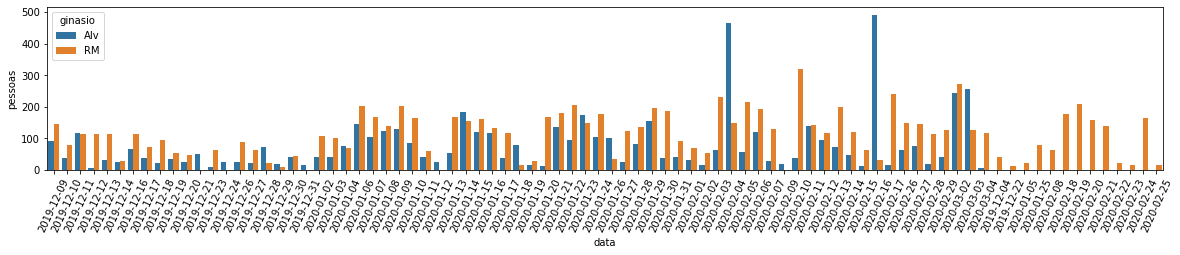

In [681]:
plt.rcParams['figure.figsize'] = [20, 3]
sns.barplot(x="data", y="pessoas",hue="ginasio",data=temp).set_title('Clientes por ginásio')
plt.xticks(rotation=65);

#sns.barplot(x="day", y="total_bill", data=tips)

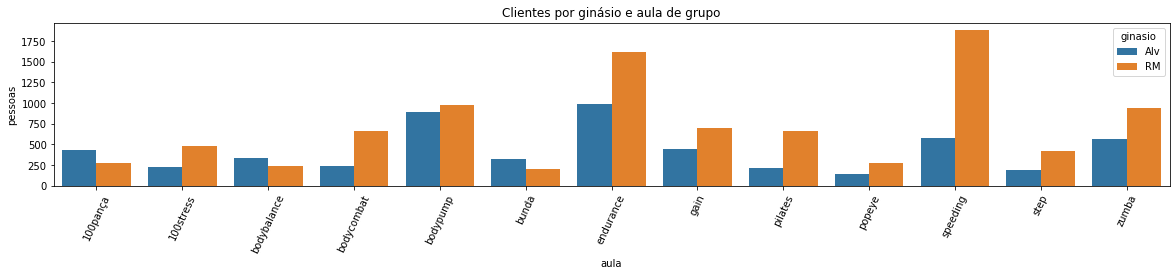

In [683]:
temp=dfTodos
temp=temp.groupby(['ginasio','aula'])['pessoas'].sum()
temp=temp.reset_index()

sns.barplot(x="aula", y="pessoas",hue="ginasio",data=temp).set_title('Clientes por ginásio e aula de grupo')
plt.xticks(rotation=65);

In [663]:
def f(funcao,porMes,mes):
    if porMes == True:
        dados = dfTodos.loc[dfTodos['mes'] == mes]
    else:
        dados = dfTodos
    if dados.empty:
        print('Não tem dados')
    else:
        plt.rcParams['figure.figsize'] = [15, 3]
        sns.barplot(x="ginasio", y="pessoas",data=dados,estimator=funcao).set_title('Clientes por ginásio')
        plt.xticks(rotation=0);
        fig = plt.gcf() # "Get current figure"
        plt.show()

interact(f, funcao=funcao,porMes=True,mes=widgets.IntSlider(min=1,max=12,step=1,value=1));

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x000001FF901D8AF8>), …